<center><img src="https://media.istockphoto.com/id/518657226/photo/taxis-on-7th-avenue-at-times-square-new-york-city.jpg?s=612x612&w=0&k=20&c=BrlO3xOnExms2bccaiVgKDNfCrr8AOL2B31Cjwj7yIY=" margin-left='auto' margin-right='auto' width='60%'></center>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from xgboost import XGBRegressor
from geopandas.tools import geocode
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
from math import sqrt,radians,cos,sin,asin
import warnings
warnings.filterwarnings('ignore')
import datetime as dte

### Importing Dataset

In [2]:
df=pd.read_csv('NYCTaxiFares.csv')

### Understanding dataset

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [5]:
df.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [6]:
df.isna().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Feature Engineering

In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [9]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

#### User-defined Function for finding distance from lattitude and longitude

In [10]:
def dist(lo1,lo2,la1,la2):
    lo1=radians(lo1)
    lo2=radians(lo2)
    la1=radians(la1)
    la2=radians(la2)
    dlo=lo2-lo1
    dla=la2-la1
    a=sin(dla/2)**2+cos(la1)*cos(la2)*sin(dlo/2)**2
    c=2*asin(sqrt(a))
    r=6371
    return(round(c*r,2))
d=[]
for i in range(df.shape[0]):
    d.append(dist(df['pickup_latitude'][i],
                df['dropoff_latitude'][i],
                df['pickup_longitude'][i],
                df['dropoff_longitude'][i]))

In [11]:
df['Dist in kms']=d

In [12]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Dist in kms'],
      dtype='object')

#### Dropping Lattitude and Longitude

In [13]:
df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis=1,inplace=True)

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,Dist in kms
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46


#### Extracting Week day from date time

In [15]:
week={0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

In [16]:
df['day_name']=df['pickup_datetime'].dt.weekday.map(week)

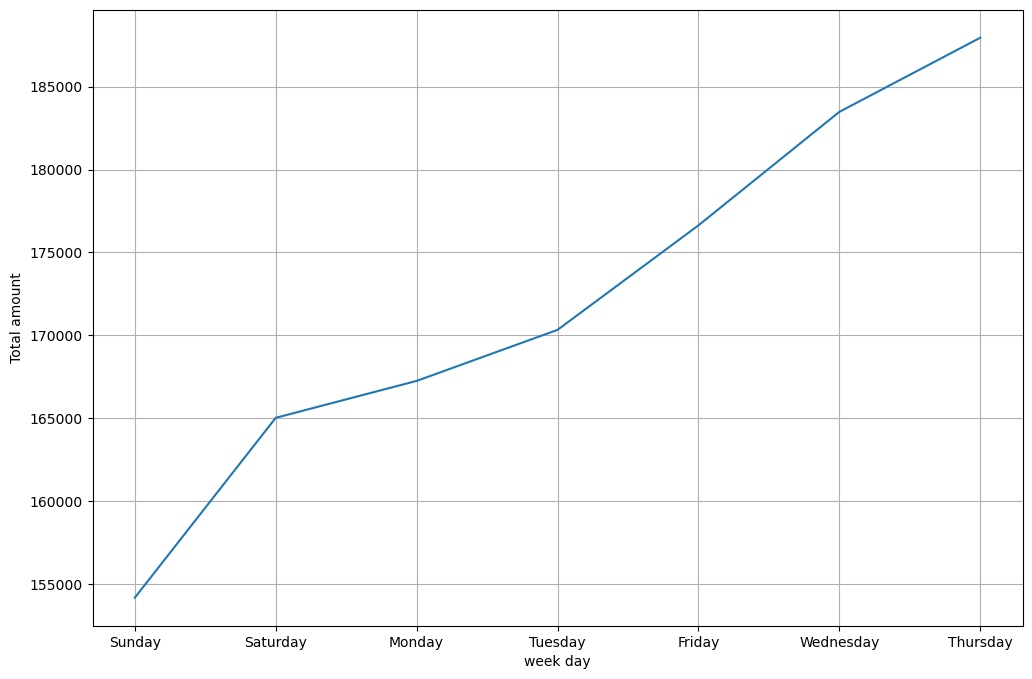

In [17]:
plt.figure(figsize=(12,8))
df.groupby('day_name')['fare_amount'].sum().sort_values().plot(kind='line')
plt.grid()
plt.xlabel('week day')
plt.ylabel('Total amount')
plt.show()

#### Encoding days based on the plot

In [18]:
week_encoded={"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

In [19]:
df['day_name']=df['day_name'].map(week_encoded)

In [20]:
df['Hour']=df['pickup_datetime'].dt.hour

In [21]:
df['month']=df['pickup_datetime'].dt.day

In [22]:
df['month'].head()

0    19
1    17
2    17
3    11
4    17
Name: month, dtype: int64

### Visualizations

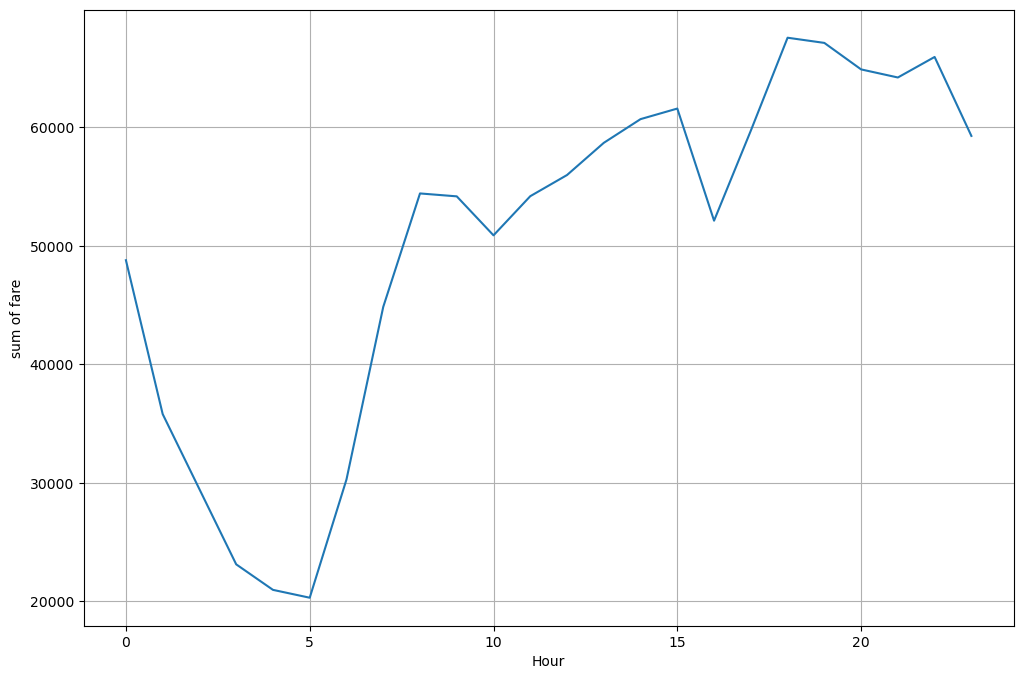

In [23]:
plt.figure(figsize=(12,8))
df.groupby('Hour')['fare_amount'].sum().plot()
plt.grid()
plt.xlabel('Hour')
plt.ylabel('sum of fare')
plt.show()

Highest total fare collected was on 6:00pm UTC

In [24]:
date=[]
fare=[]
for day in list(df['pickup_datetime'].dt.day.sort_values().unique()):
    date.append('Date:'+str(day))
    fare.append(df[df.pickup_datetime.dt.day==day].fare_amount.sum())

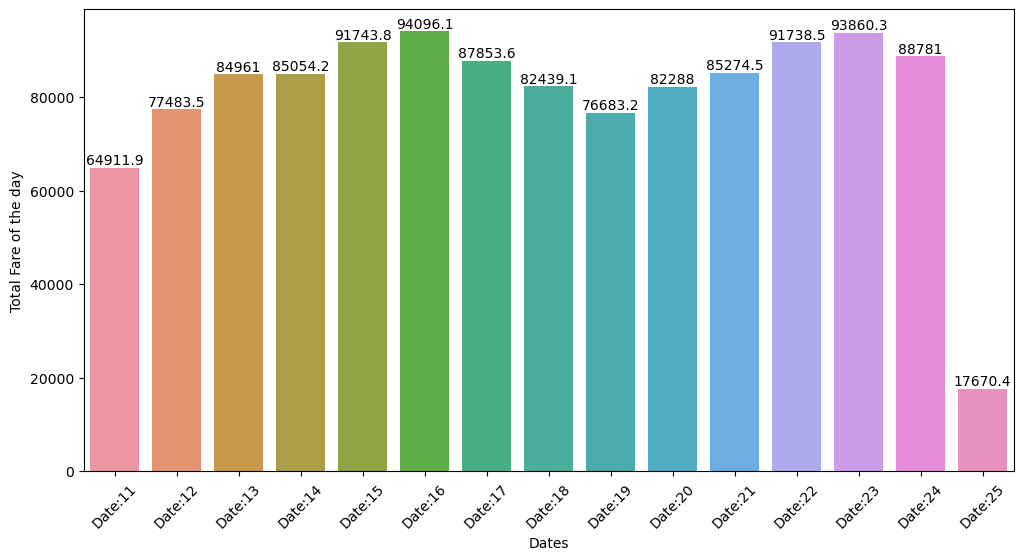

In [25]:
plt.figure(figsize=(12,6))
ax=sns.barplot(date,fare)
plt.xlabel('Dates')
plt.ylabel('Total Fare of the day')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

The Highest collection of fare was on 16th of that month which wa (94096)

<AxesSubplot:xlabel='fare_class'>

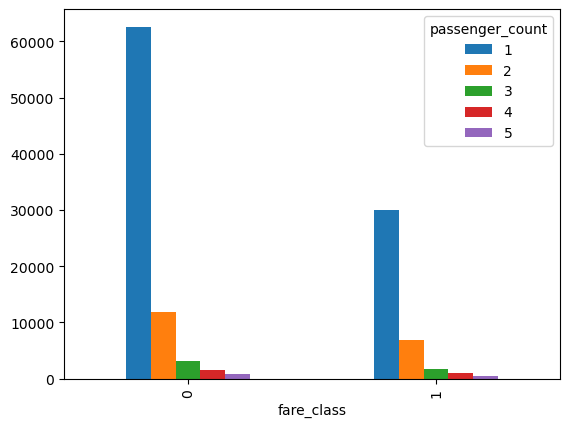

In [26]:
pd.crosstab(df['fare_class'],df['passenger_count']).plot(kind='bar')

Highest no. of rides requested was with class 0, and mostly all rides was with single rider 

<AxesSubplot:xlabel='day_name', ylabel='Fare Amount'>

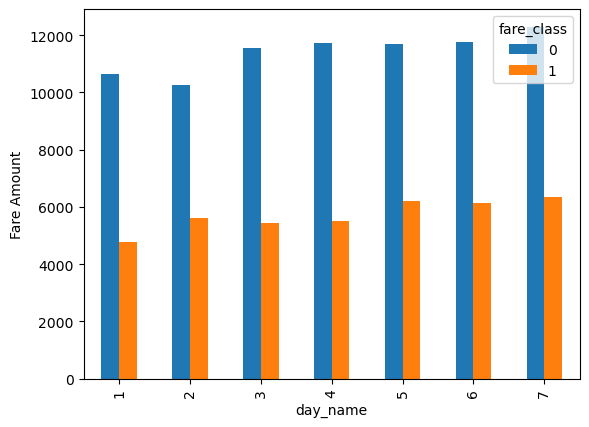

In [27]:
pd.crosstab(df['day_name'],df['fare_class']).plot(kind='bar',ylabel='Fare Amount')

Highest fare amount of both fare class was collected  on Thursday

<AxesSubplot:ylabel='fare_amount'>

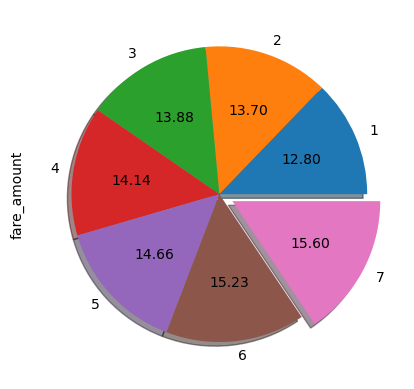

In [28]:
df.groupby('day_name')['fare_amount'].sum().plot(
    kind='pie',autopct='%.2f',explode=[0,0,0,0,0,0,0.1]
    ,shadow=True)

<AxesSubplot:xlabel='Hour', ylabel='No. of Rides booked'>

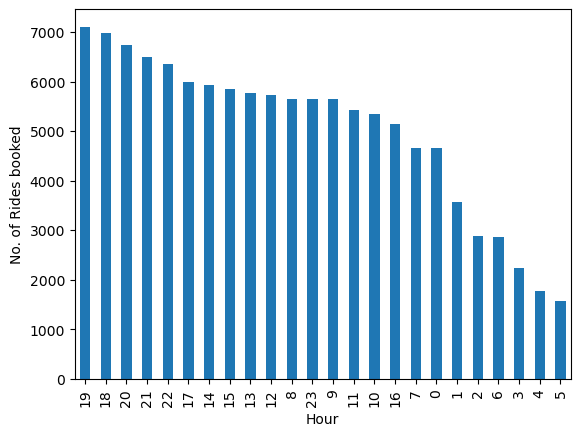

In [29]:
df['Hour'].value_counts().plot(kind='bar',xlabel='Hour'
                               ,ylabel='No. of Rides booked')

No. of rides was on peak by 7.00PM

<AxesSubplot:xlabel='Hour', ylabel='Total fare collected'>

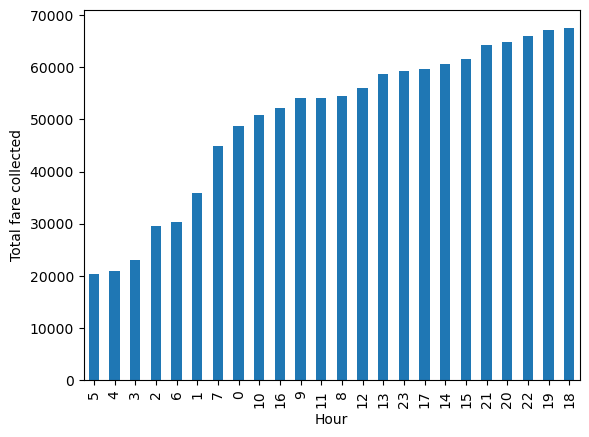

In [30]:
df.groupby('Hour')['fare_amount'].sum().sort_values().plot(kind='bar',
                                                           ylabel='Total fare collected')

In [31]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [32]:
df.head()

,fare_amount,fare_class,passenger_count,Dist in kms,day_name,Hour,month
0,6.5,0,1,1.93,1,8,19
1,6.9,0,1,1.77,5,15,17
2,10.1,1,2,3.82,5,11,17
3,8.9,0,1,2.16,2,21,11
4,19.7,1,1,9.46,5,2,17


### Train Test Split

In [33]:
x=df.drop(['fare_amount'],axis=1)

In [34]:
y=df['fare_amount']

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

### User-defined function for evaluation metrics

In [36]:
def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse=mean_squared_error(actual,pred,squared=False)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4),'\n')

### Model Building

#### Linear Regression

In [37]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
train_lr=lr.predict(xtrain)
test_lr=lr.predict(xtest)
reg_metrics(ytrain,train_lr)
reg_metrics(ytest,test_lr)

R^2 Error :  0.8076
MSE  :  10.8325
MAE  :  1.9333
RMSE :  3.2913 

R^2 Error :  0.8125
MSE  :  10.5047
MAE  :  1.9111
RMSE :  3.2411 



#### Decision Tree

In [38]:
dt=DecisionTreeRegressor(max_depth=9,min_samples_split=15,min_samples_leaf=15)
dt.fit(xtrain,ytrain)
train_dt=dt.predict(xtrain)
test_dt=dt.predict(xtest)
reg_metrics(ytrain,train_dt)
reg_metrics(ytest,test_dt)

R^2 Error :  0.8461
MSE  :  8.6661
MAE  :  1.7723
RMSE :  2.9438 

R^2 Error :  0.8427
MSE  :  8.8124
MAE  :  1.784
RMSE :  2.9686 



#### Random Forest

In [39]:
rf=RandomForestRegressor(n_estimators=300,n_jobs=-1,max_depth=17,min_samples_split=17,min_samples_leaf=17)
rf.fit(xtrain,ytrain)
train_rf=rf.predict(xtrain)
test_rf=rf.predict(xtest)
reg_metrics(ytrain,train_rf)
reg_metrics(ytest,test_rf)

R^2 Error :  0.8588
MSE  :  7.9496
MAE  :  1.6889
RMSE :  2.8195 

R^2 Error :  0.8457
MSE  :  8.6448
MAE  :  1.7793
RMSE :  2.9402 



#### AdaBoost

In [40]:
ada=AdaBoostRegressor(learning_rate=0.01,n_estimators=100)
ada.fit(xtrain,ytrain)
train_ada=ada.predict(xtrain)
test_ada=ada.predict(xtest)
reg_metrics(ytrain,train_ada)
reg_metrics(ytest,test_ada)

R^2 Error :  0.8215
MSE  :  10.054
MAE  :  1.974
RMSE :  3.1708 

R^2 Error :  0.8263
MSE  :  9.7285
MAE  :  1.9629
RMSE :  3.1191 



#### Gradient Boost

In [41]:
gb=GradientBoostingRegressor(n_estimators=200,max_depth=6,min_samples_split=13,min_samples_leaf=14)
gb.fit(xtrain,ytrain)
train_gb=gb.predict(xtrain)
test_gb=gb.predict(xtest)
reg_metrics(ytrain,train_gb)
reg_metrics(ytest,test_gb)

R^2 Error :  0.8534
MSE  :  8.2572
MAE  :  1.7452
RMSE :  2.8735 

R^2 Error :  0.8472
MSE  :  8.5596
MAE  :  1.7706
RMSE :  2.9257 



### Plotting the scores of all models

In [42]:
acc=pd.DataFrame({'models':['Linear Reg','Dtree','Random forest','AdaBoost','Gradient Boost'],
                  'r2':[round(r2_score(ytest,test_lr),2),round(r2_score(ytest,test_dt),2),round(r2_score(ytest,test_rf),2),round(r2_score(ytest,test_ada),2),round(r2_score(ytest,test_gb),2)]})
acc.sort_values(inplace=True,by='r2')

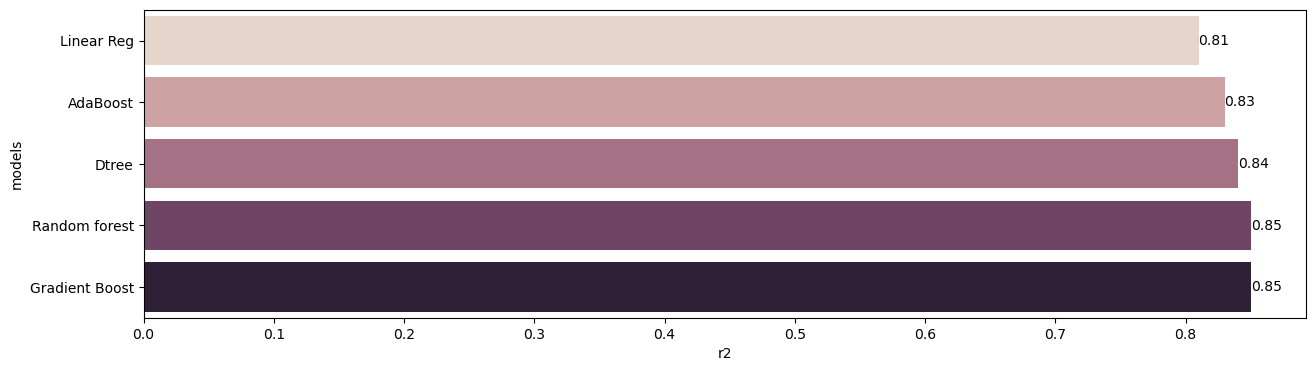

In [43]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x='r2',y='models',data=acc,palette='ch:.120')
ax.bar_label(ax.containers[0])
plt.show()

Both Gradient Boost and Random forest works well 

### User-defined function for finding latitude and longitude from location entered by user

In [44]:
def lon_lat(pickup,drop):
    pick = geocode(pickup)
    drp=geocode(drop)
    pick_point = pick.geometry.iloc[0]
    drp_point=drp.geometry.iloc[0]
    pick_lat, pick_lon = pick_point.y, pick_point.x
    drp_lat,drop_lon=drp_point.y,drp_point.x
    return dist(pick_lon,drop_lon,pick_lat,drp_lat)

### User Defined function for finding current day, hour, month for passing to the model

In [45]:
def dtime():
    curr=dte.datetime.now()
    month=curr.day
    Hour=curr.hour
    wd=pd.Series([curr.strftime('%A')])
    wd=wd.map(week_encoded)
    day_name=wd[0]
    return day_name,Hour,month

## App building with gradio

### Dumping the best model into pkl file

In [46]:
import pickle
with open('gbmodel.pkl','wb') as f:
    pickle.dump(rf,f)

### User defined function for predicting

In [47]:
def make_prediction(fare_class,passenger_count,pickup,drop):
    with open('gbmodel.pkl','rb') as f:
        clf=pickle.load(f)
        distance=lon_lat(pickup,drop)
        now=dtime()
        day_name,Hour,month=now[0],now[1],now[2]
        li=[fare_class,passenger_count,distance,day_name,Hour,month]
        li=np.asarray(li).reshape(-1,1).T
        print(li)
        pred=clf.predict(li)
        return 'The Fare is $ %.2f' %(pred[0])

In [48]:
import gradio as gr
fare_class=gr.Number(label='Enter fare class')
passenger_count=gr.Number(label='Enter no. of passengers')
pickup=gr.Textbox(label='Enter Pickup Location')
drop=gr.Textbox(label='Enter Drop location')
output=gr.Textbox()

In [ ]:
app=gr.Interface(fn=make_prediction,inputs=[fare_class,passenger_count,pickup,drop],outputs=output)
app.launch(debug=True)

### Output of Gradio UI

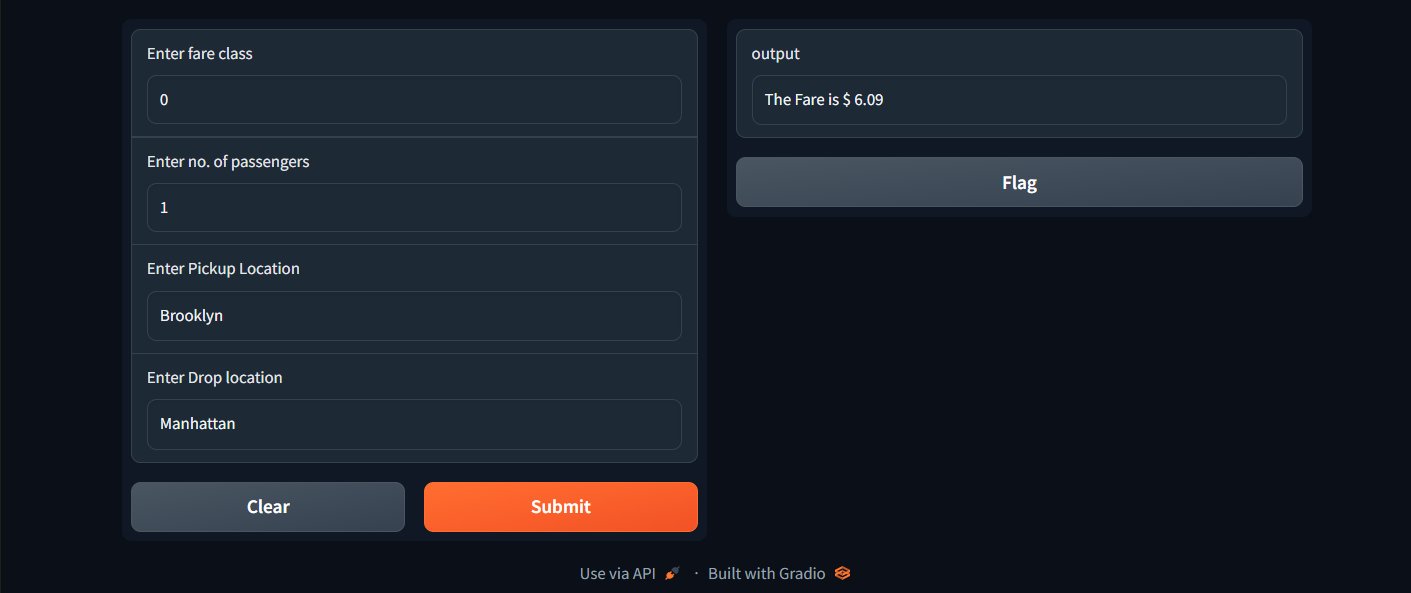